In [73]:
import numpy as np 
import pandas as pd 
 

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

In [3]:
dataset_url = 'https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Patient/PatientInfo.csv'

In [4]:
covid = pd.read_csv(dataset_url)

In [87]:
covid.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,decease
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,1,1
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,1,1
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,1,1
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,1,1
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,1,1


In [88]:
covid.tail()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,decease
2766,7000000005,9120.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,20.0,NaN,2020-03-24,NaN,NaN,0,1
2767,7000000006,9087.0,male,NaN,30s,United States,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,23.0,NaN,2020-03-24,NaN,NaN,0,1
2768,7000000007,NaN,female,1996.0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,26.0,NaN,2020-03-25,NaN,NaN,0,1
2769,7000000008,NaN,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,NaN,NaN,0,1
2770,7000000009,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,0,1


In [8]:
covid.shape

(2771, 18)

In [16]:
covid.state.value_counts()

isolated    1839
released     879
deceased      53
Name: state, dtype: int64

In [17]:
covid.isnull().sum()

patient_id               0
global_num            1107
sex                      6
birth_year             357
age                     13
country                  0
province                 0
city                    68
disease               2752
infection_case         928
infection_order       2740
infected_by           2121
contact_number        2254
symptom_onset_date    2382
confirmed_date           0
released_date         2062
deceased_date         2723
state                    0
dtype: int64

In [43]:
covid['age'].value_counts()

20s     651
50s     522
40s     399
30s     351
60s     334
70s     165
80s     138
10s     115
90s      43
0s       38
100s      1
66s       1
Name: age, dtype: int64

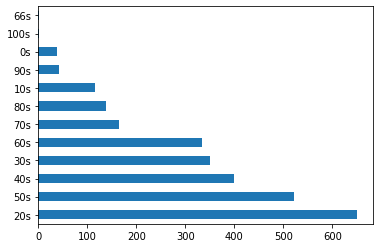

In [38]:
covid['age'].value_counts().plot(kind='barh');

In [26]:
covid['age'].isnull().sum()

13

In [67]:
'''Replacing is null value for age with the median age of SK with Sk median age there is 40.8 and the age is catergorized in 10s so adding 14 40s into the null value of age''' 
covid['age'].fillna('40s', inplace = True)

In [122]:
covid.isnull().sum()

patient_id               0
global_num            1107
sex                      0
birth_year             357
age                      0
country                  0
province                 0
city                    68
disease               2752
infection_case         928
infection_order       2740
infected_by           2121
contact_number        2254
symptom_onset_date    2382
confirmed_date           0
released_date         2062
deceased_date         2723
state                    0
decease                  0
dtype: int64

In [69]:
covid['state'].value_counts()

isolated    1839
released     879
deceased      53
Name: state, dtype: int64

In [74]:
condition = {'isolated':0,'released':1,'deceased':3}
covid.state = covid.state.map(condition)

In [121]:
covid['province'].value_counts()

Gyeongsangbuk-do     1157
Gyeonggi-do           466
Seoul                 434
Chungcheongnam-do     128
Busan                 116
Gyeongsangnam-do       95
Daegu                  63
Incheon                61
Sejong                 46
Chungcheongbuk-do      44
Ulsan                  39
Gangwon-do             37
Daejeon                34
Gwangju                20
Jeollabuk-do           13
Jeju-do                 9
Jeollanam-do            9
Name: province, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sns.load_dataset('titanic').drop(columns=['alive']), random_state=0)
target = 'decease'

In [76]:
'''isolate=0 release='1' decease 0'''

"isolate=0 release='1' decease 0"

In [81]:
covid['decease'] = covid.state == 3

In [80]:
covid.drop('decease',axis=1,inplace=True)

In [86]:
decease_stat = {1:0,2:1}
covid.decease = covid.decease.map(decease_stat)

In [100]:
y = covid.decease
X = covid.drop('decease', axis=1)

In [113]:
import seaborn as sns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

0       1
1       1
2       1
3       1
4       1
       ..
2766    1
2767    1
2768    1
2769    1
2770    1
Name: decease, Length: 2771, dtype: int64

In [116]:
len(X_test)

555

In [117]:
len(y)

2771

In [120]:
covid['sex'].fillna('male', inplace = True)

In [ ]:
features = ['sex','age', 'province']
target = 'decease'

In [1]:
X

NameError: name 'X' is not defined